#Multi label Image Classification Pipeline


Multilabel image classifier allows us to identify multiple objects of interest in a give image. For instance, in the following image we can see that we have both green, yellow and red peppers:

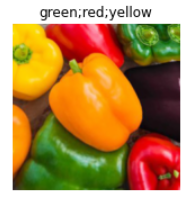

Each of identifiable objects in the image is represented by the label that was provided in the dataset for the model to learn on. The dataset is organized as csv file that normally contains the information about images (x) and labels (y) associated with each image.

## Let's install all libraries & dependencies that we need

In [1]:
!pip install -Uqq fastbook
!pip install -Uqq unpackai

import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.5 MB/s 
     |████████████████████████████████| 1.2 MB 32.7 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 189 kB 33.7 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 51 kB 333 kB/s 
     |████████████████████████████████| 58 kB 3.1 MB/s 
     |████████████████████████████████| 91 kB 8.5 MB/s 
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *

We will create the folder on the Google Drive to organize the dataset inside.

In [3]:
path = Path("/content/gdrive/MyDrive/Datasets/")

Down below we will introduce you two methods of organizing the dataset.
1. **The image scraping & labeling method optimized by Ray Zhang at unpackAI.**
2. **The labeling technique for your own images. For that you will need to upload all your images to your Google Drive.** 

## 1. Image scraping & labeling method

### Scrape images of the internet

In order to collect and design your own dataset we provide you with the scraping tool below.

**DuckDuckGo Image Scraper** - Scrape and Collect images via a search engine from the web.

In order to collect your images we will be utilizing **DuckDuckGo**. DuckDuckGo is an internet search engine that emphasizes protecting searchers' privacy and avoiding the filter bubble of personalized search results.

The below is a slightly modified version of the notebook by [Jew Dockrill](https://joedockrill.github.io/jmd_imagescraper/). Many thanks to him for the notebook and the package he wrote.

> Note: When using a Web Search Engine to download your pictures, there's no way to be sure exactly what images a search like this will find. The results can change over time. We've heard of at least one case of a community member who found some unpleasant pictures in their search results. You'll receive whatever images are found by the web search engine. If you're running this at work, or with kids, etc, then be cautious before you display the downloaded images.

##### Install & import `DuckDuckGoImageScraper` specific packages

> In order to run our scraper we have to import additional packages.

In [4]:
!pip install -q jmd_imagescraper
from jmd_imagescraper.imagecleaner import *
#from pathlib import Path
from jmd_imagescraper.core import *
from unpackai.utils import clean_error_img

Below we define the 2 variables:

1. `number_images_to_download`: The number of images you download per defined class. This can go up to 477 at the time of writing.
1. `duckduckgo_search`: Here we define our **classes** (i.e. mask_on, mask_off) and your **search term** (i.e. person with a medical mask, real person faces).

In [5]:
number_images_to_download = 20
duckduckgo_search(path, "peppers", "bell peppers", max_results=number_images_to_download)

Duckduckgo search: bell peppers


[Path('/content/gdrive/MyDrive/Datasets/peppers/001_2af37df7.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/002_c3e4b5a1.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/003_68fb81d4.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/004_c44c05e0.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/005_f20e3ae1.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/006_eb51139f.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/007_0dcfa6f2.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/008_82859d58.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/009_2afa0980.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/010_22ad650e.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/011_654ff80e.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/012_714b7ef2.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/013_15e63251.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/014_4bb7aa44.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/

We have now downloaded all the images into a folder that we specified and named it `path`. Lets check the destination folder of our images.

In [6]:
path

Path('/content/gdrive/MyDrive/Datasets')

With the command below we can check that we now have 1 subfolder for each class.

In [7]:
path.ls()

(#1) [Path('/content/gdrive/MyDrive/Datasets/peppers')]

Sometimes, especially in real life projects, erronous image is a frequently occuring thing. We can fix the problem by checking each subfolder, and deleting all of the pictures that can not be open properly.

In [8]:
clean_error_img(path)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

You can use this to get delete images that are not suitable to either class.

In [9]:
display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

### Label your scraped images

Use this to provide labels to the images that you just scraped. You can add as many labels as you want. **Once you have finished labelling all your data make sure to save your data as a csv file**.

In [10]:
from unpackai.turk.image import MultiClassImageLabeler

In [11]:
labeler = MultiClassImageLabeler(path)
labeler(["red","green","yellow"])

  0%|          | 0/20 [00:00<?, ?it/s]

Output()

interactive(children=(Text(value='./progress.csv', description='path'), Button(description='Run Interact', sty…

In case you don't change the path, you can find  './progress.csv' in the root directory of your session disk.
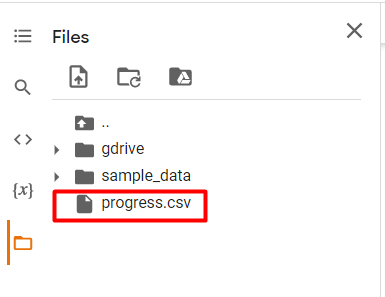

## The labeling technique for your own images. 
## CSV Image Dataset. 
 

CSV (Comma-separated values) is a file type that is similar to your excel file. In order to create your own CSV file you will have to:

1. Add all your images to the Google Drive.
2. Create a CSV file with two columns. Column 1 should contain each path to each individual image and column 2 should contain the respective labels. Both columns should have headers. See the example below.

|path | labels |
|:--- | :--- |
| /content/images/peppers/025_66e70c72.jpg | red|
|/content/images/peppers/042_b5c665c6.jpg| green|
|/content/images/peppers/017_376cf601.jpg | red, green|
|/content/images/peppers/050_ac0306a3.jpg| red, green, yellow|
|... | ...|

**!!! IMPORTANT. Labeling Requirements**

* Upload your CSV file to Google Drive.
* Labels in CSV file have to be a string separated by  "," and all lower-cased. 
* When loading labels, the function will print out all the possible category, when you can see ```["red", "green", "gren", "yellow"]``` you might discover a typo, that can be fixed. 

## Create data loaders

When your dataset is organized, we need to provide the path to it before creating the Dataloader for model training.

In [12]:
#MultiClassImageLabeler.gety_from_csv("DEFINE YOUR PATH OF YOUR CSV")

In [15]:
MultiClassImageLabeler.gety_from_csv("/content/progress.csv")

All possible labels:	['yellow', 'red', 'green']


<function unpackai.turk.image.MultiClassImageLabeler.gety_from_csv.<locals>.get_y>

In [16]:
dblock = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=labeler.get_y,
    item_tfms=Resize(128))

dblock = dblock.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = dblock.dataloaders(path, bs=6)

Creating dataset with 20 labels


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


View a batch of data

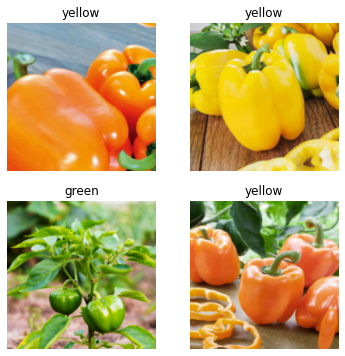

In [17]:
dls.show_batch(max_n=4)

Train model

In [18]:
learn = cnn_learner(dls, resnet18, metrics=accuracy_multi)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy_multi,time
0,1.048453,1.134812,0.500000,00:00


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.942643,0.957709,0.500000,00:00
1,0.895725,0.793832,0.500000,00:00
2,0.860789,0.707467,0.500000,00:00
3,0.839116,0.725990,0.583333,00:00
4,0.808734,0.742092,0.583333,00:00
5,0.780711,0.728216,0.500000,00:00
6,0.706938,0.736969,0.583333,00:00
7,0.673936,0.715005,0.583333,00:00


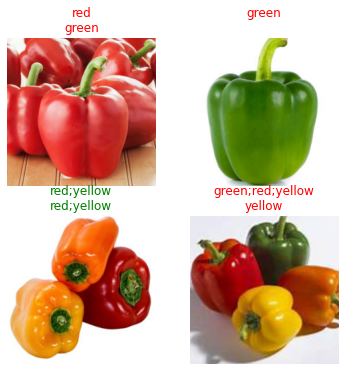

In [19]:
learn.show_results()

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

,target,predicted,probabilities,loss
0,green;red;yellow,yellow,"TensorBase([[0.1426, 0.3840, 0.9316],\n [0.5265, 0.2952, 0.2351],\n [0.2427, 0.3685, 0.0921],\n [0.4396, 0.5485, 0.8053]])",0.9918969869613647


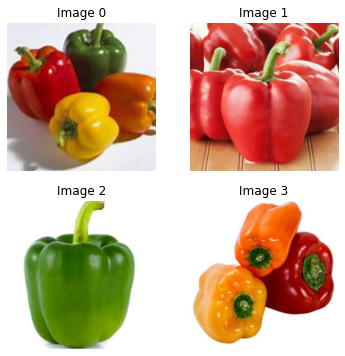

In [21]:
interp.plot_top_losses(4)

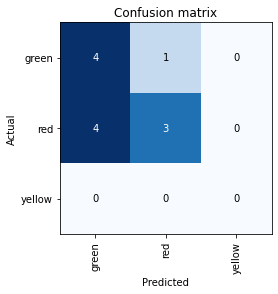

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [23]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix

In [24]:
preds = np.argmax(interp.preds.cpu().detach().numpy(), axis=1 )
preds

array([0, 2, 2, 1])

In [25]:
targs = np.argmax(interp.targs.cpu().detach().numpy(), axis=1)
targs

array([1, 0, 1, 0])

In [26]:
multilabel_confusion_matrix(targs, preds)

array([[[1., 1.],
        [2., 0.]],

       [[1., 1.],
        [2., 0.]],

       [[2., 2.],
        [0., 0.]]])

In [27]:
from fastai.vision.widgets import *

In [28]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [29]:
btn_upload = widgets.FileUpload()
btn_run = widgets.Button(description='Classify')
out_pl = widgets.Output()
out_pl.clear_output()

lbl_pred = widgets.Label()

In [30]:
VBox([widgets.Label('What bell pepper is it?'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [31]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)